# LIBERO Initialize

[robosuite WARNING] No private macro file found! (macros.py:53)
[robosuite WARNING] It is recommended to use a private macro file (macros.py:54)
[robosuite WARNING] To setup, run: python /root/miniconda3/envs/openvla/lib/python3.10/site-packages/robosuite/scripts/setup_macros.py (macros.py:55)
Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
Users of this version of Gym should be able to simply replace 'import gym' with 'import gymnasium as gym' in the vast majority of cases.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


[info] using task orders [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Task: Task(name='pick_up_the_alphabet_soup_and_place_it_in_the_basket', language='pick up the alphabet soup and place it in the basket', problem='Libero', problem_folder='libero_object', bddl_file='pick_up_the_alphabet_soup_and_place_it_in_the_basket.bddl', init_states_file='pick_up_the_alphabet_soup_and_place_it_in_the_basket.pruned_init')
[info] retrieving task 0 from suite libero_object
language instruction is pick up the alphabet soup and place it in the basket
bddl file is /robot/robot-foundation-model/user/qiao/code/LIBERO/libero/libero/./bddl_files/libero_object/pick_up_the_alphabet_soup_and_place_it_in_the_basket.bddl
Original cameras: ('frontview', 'birdview', 'agentview', 'sideview', 'galleryview', 'robot0_robotview', 'robot0_eye_in_hand')
  frontview: pos=[1.   0.   0.65], quat=[0.56084189 0.43064645 0.43064645 0.56084189]
  birdview: pos=[-0.2  0.   3. ], quat=[0.70710678 0.         0.         0.70710678]
  agentview: 

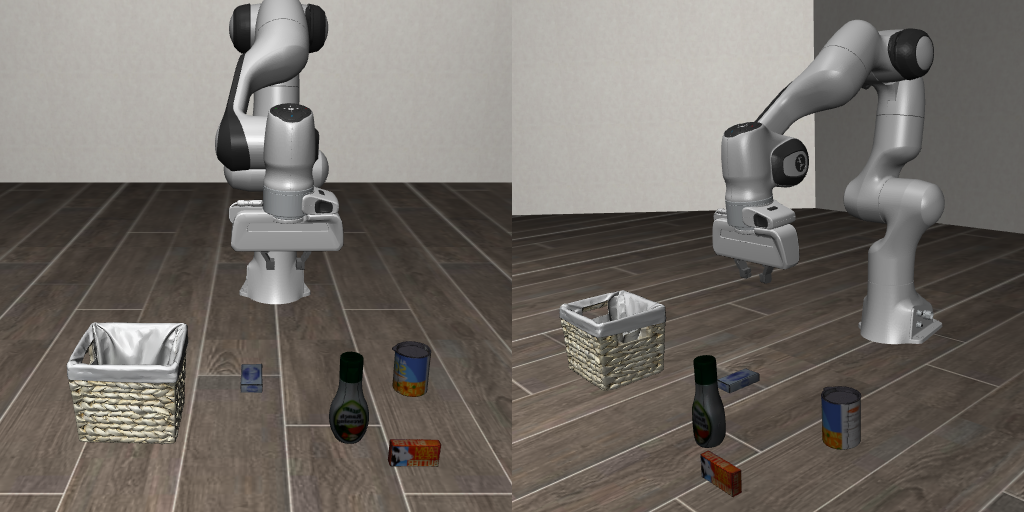

In [1]:
import os
# os.environ['PYTHONPATH'] = "/robot/robot-foundation-model/user/qiao/code/LIBERO" + ':' + os.environ.get('PYTHONPATH', '')
os.environ["MUJOCO_GL"] = "osmesa"
os.environ["PYOPENGL_PLATFORM"] = "osmesa"

from libero.libero import benchmark
from libero.libero.envs import OffScreenRenderEnv

from libero.libero import get_libero_path

from libero.libero import benchmark
from libero.libero.envs import OffScreenRenderEnv
import os
from libero.libero import get_libero_path
import imageio
import numpy as np
import PIL
from IPython.display import display


replay_dir = "/robot/robot-rfm/user/qiao/code/openvla/libero_replay_20/libero_object__1__pick_up_the_cream_cheese_and_place_it_in_the_basket__10"
import json


with open(os.path.join(replay_dir, "camera_calib.json")) as f:
    camera_param = json.load(f)
    
# # camera_param
# pos_str_agent = camera_param['agentview']['pos']
# quat_str_agent = camera_param['agentview']['quat']
# pos_str_side = camera_param['sideview']['pos']
# quat_str_side = camera_param['sideview']['quat']
# pos_str_agent, quat_str_agent, pos_str_side, quat_str_side

# 设置保存路径
save_dir = "./rollouts_1231/output"
os.makedirs(save_dir, exist_ok=True)


benchmark_dict = benchmark.get_benchmark_dict()
task_suite_name = "libero_object" #"libero_object"  # can also choose libero_spatial, libero_object, etc.
task_suite = benchmark_dict[task_suite_name]()


# retrieve a specific task
task_id = 0
task = task_suite.get_task(task_id)

print("Task:", task)


task_name = task.name
task_description = task.language
task_bddl_file = os.path.join(get_libero_path("bddl_files"), task.problem_folder, task.bddl_file)
print(f"[info] retrieving task {task_id} from suite {task_suite_name}")
print(f"language instruction is {task_description}")
print(f"bddl file is {task_bddl_file}")

env_args = {
    "bddl_file_name": task_bddl_file,
    "camera_heights": 512,
    "camera_widths": 512,
    "camera_names": ["agentview", "sideview"],  # ← 关键
}
env = OffScreenRenderEnv(**env_args)
env.seed(0)
env.reset()


# 获取相机 ID
cam_id_agent = env.env.sim.model.camera_name2id("agentview")
cam_id_side = env.env.sim.model.camera_name2id("sideview")

print("Original cameras:", env.env.sim.model.camera_names)
for i, name in enumerate(env.env.sim.model.camera_names):
    pos = env.env.sim.model.cam_pos[i]
    quat = env.env.sim.model.cam_quat[i]
    print(f"  {name}: pos={pos}, quat={quat}")
    
    
# # 强制修改（通过 ctypes 或直接写内存）
# env.env.sim.model.cam_pos[cam_id_agent] = pos_str_agent #np.array([float(i) for i in pos_str_agent.split(" ") if i != "" ])
# env.env.sim.model.cam_quat[cam_id_agent] = quat_str_agent  #np.array([float(i) for i in quat_str_agent.split(" ") if i != "" ])
# env.env.sim.model.cam_pos[cam_id_side] = pos_str_side #np.array([float(i) for i in pos_str_side.split(" ") if i != "" ])
# env.env.sim.model.cam_quat[cam_id_side] = quat_str_side #np.array([float(i) for i in quat_str_side.split(" ") if i != "" ])



# 0.65861317 0.         1.61035002
pos_str_agent = "0.91317 0.05         0.625" # 
# "0.63801772 0.30484972 0.30484984 0.63801772"
quat_str_agent = "-0.57543619 0.41104414 -0.41104404 0.57543629" # "-0.63801772 0.30484984 -0.30484972 0.63801772"

# 0.65861317 0.         1.61035002
pos_str_side = "0.61317 -0.85         0.55" # 
# "0.63801772 0.30484972 0.30484984 0.63801772"
quat_str_side = "-0.30032544 0.22146008 -0.58002858 0.72436878" # "-0.63801772 0.30484984 -0.30484972 0.63801772"

# 强制修改（通过 ctypes 或直接写内存）
env.env.sim.model.cam_pos[cam_id_agent] = np.array([float(i) for i in pos_str_agent.split(" ") if i != "" ])
env.env.sim.model.cam_quat[cam_id_agent] = np.array([float(i) for i in quat_str_agent.split(" ") if i != "" ])
env.env.sim.model.cam_pos[cam_id_side] = np.array([float(i) for i in pos_str_side.split(" ") if i != "" ])
env.env.sim.model.cam_quat[cam_id_side] = np.array([float(i) for i in quat_str_side.split(" ") if i != "" ])


init_states = task_suite.get_task_init_states(task_id)
init_state_id = 0
env.set_init_state(init_states[init_state_id])

env.sim.forward()  # 更新物理状态

print("Updated cameras:", env.env.sim.model.camera_names)
for i, name in enumerate(env.env.sim.model.camera_names):
    pos = env.env.sim.model.cam_pos[i]
    quat = env.env.sim.model.cam_quat[i]
    print(f"  {name}: pos={pos}, quat={quat}")


dummy_action = [0.0] * 7    
obs, reward, done, info = env.step(dummy_action)



# 确保是 uint8
def format_view_img(view_img):
    if view_img.dtype != np.uint8:
        if view_img.max() <= 1.0:
            view_img = (view_img * 255).astype(np.uint8)
        else:
            view_img = view_img.astype(np.uint8)
    return view_img

# LIBERO 的 obs 是 dict，图像在 "agentview_image" 或类似 key
agentview_img = format_view_img(obs["agentview_image"]) # shape: (512, 512, 3), dtype: uint8 or float
sideview_img = format_view_img(obs["sideview_image"]) # shape: (512, 512, 3), dtype: uint8 or float



view_img = np.hstack([agentview_img, sideview_img])
# 转为 PIL Image
pil_img = PIL.Image.fromarray(view_img)
print("Image shape:", view_img.shape)
# pil_img.show()  # 或 pil_img.save("test.png")
display(pil_img)  # 这不会调用系统 display，而是嵌入到 notebook


# 动作预测

In [2]:
# Install minimal dependencies (`torch`, `transformers`, `timm`, `tokenizers`, ...)
# > pip install -r https://raw.githubusercontent.com/openvla/openvla/main/requirements-min.txt
from transformers import AutoModelForVision2Seq, AutoProcessor
from PIL import Image

import torch
from PIL import Image

def make_sure_image_is_pil(image):
    # If `image` is a numpy array (e.g., from OpenCV or loaded via decord/numpy)
    if isinstance(image, np.ndarray):
        # Ensure values are in [0, 255] and dtype is uint8
        if image.dtype != np.uint8:
            if image.max() <= 1.0:
                image = (image * 255).astype(np.uint8)
            else:
                image = image.astype(np.uint8)
        # Convert BGR (if from OpenCV) to RGB if needed
        if image.shape[-1] == 3 and is_bgr:  # only if you know it's BGR
            image = image[:, :, ::-1]
        return Image.fromarray(image)

def ensure_pil_image(img):
    from PIL import Image
    import numpy as np
    if isinstance(img, Image.Image):
        return img.convert("RGB")
    elif isinstance(img, np.ndarray):
        if img.ndim == 2:
            img = np.stack([img] * 3, axis=-1)  # grayscale to RGB
        elif img.shape[-1] == 4:
            img = img[:, :, :3]  # RGBA to RGB
        if img.dtype != np.uint8:
            img = np.clip(img, 0, 1) if img.max() <= 1.0 else img
            img = (img * 255).astype(np.uint8) if img.max() <= 1.0 else img.astype(np.uint8)
        return Image.fromarray(img).convert("RGB")
    else:
        raise TypeError(f"Unsupported image type: {type(img)}")

# Load Processor & VLA
model_path ="/robot/robot-rfm/user/qiao/tmp/.hf_cache/hub/openvla"# "/robot/robot-rfm/user/qiao/tmp/.hf_cache/hub/openvla-7b-finetuned-libero-object"  #"/robot/robot-rfm/user/qiao/tmp/.hf_cache/hub/openvla-object"#
# "/robot/robot-rfm/user/qiao/tmp/.hf_cache/hub/openvla"
processor = AutoProcessor.from_pretrained(model_path, trust_remote_code=True,
                                          local_files_only=True,  # ← 关键！禁止任何网络请求
                                          )
vla = AutoModelForVision2Seq.from_pretrained(
    # "/robot/robot-rfm/user/qiao/tmp/.hf_cache/hub/openvla", 
    model_path,
    # attn_implementation="flash_attention_2",  # [Optional] Requires `flash_attn`
    torch_dtype=torch.bfloat16, 
    local_files_only=True,  # ← 关键！禁止任何网络请求
    low_cpu_mem_usage=True, 
    trust_remote_code=True
).to("cuda:0")



2026-01-07 10:46:46.532591: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-07 10:46:46.562121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2026-01-07 10:46:46.562154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2026-01-07 10:46:46.563150: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2026-01-07 10:46:46.567991: I tensorflow/core/platform/cpu_feature_guar

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [10]:
vla.predict_action(**inputs, unnorm_key="bridge_orig", do_sample=False)

: 

In [4]:
prompt = f"In: What action should the robot take to {task.language}?\nOut:"
image: Image.Image = ensure_pil_image(agentview_img) #get_from_camera(...)

In [9]:
inputs = processor(prompt, image).to("cuda:0", dtype=torch.bfloat16)

In [8]:
inputs

{'input_ids': tensor([[    1,   512, 29901,  1724,  3158,   881,   278, 19964,  2125,   304,
          5839,   701,   278, 22968, 22300,   322,  2058,   372,   297,   278,
         25972, 29973,    13,  3744, 29901]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1]], device='cuda:0'), 'pixel_values': tensor([[[[ 8.6719e-01,  8.4766e-01,  8.4766e-01,  ...,  8.6719e-01,
            8.8281e-01,  8.4766e-01],
          [ 8.6719e-01,  8.6719e-01,  8.4766e-01,  ...,  8.4766e-01,
            8.6719e-01,  8.4766e-01],
          [ 8.4766e-01,  8.3203e-01,  8.3203e-01,  ...,  8.3203e-01,
            8.6719e-01,  8.6719e-01],
          ...,
          [-4.3213e-02, -8.8501e-03, -8.8501e-03,  ..., -3.8672e-01,
           -4.5508e-01, -4.0430e-01],
          [-6.0303e-02, -6.0303e-02,  8.3008e-03,  ..., -3.6914e-01,
           -3.1836e-01, -3.6914e-01],
          [-9.4727e-02, -4.3213e-02,  1.1133e-01,  ..., -4.5508e-01

In [5]:
# Grab image input & format prompt
prompt = f"In: What action should the robot take to {task.language}?\nOut:"

image: Image.Image = ensure_pil_image(agentview_img) #get_from_camera(...)
# Predict Action (7-DoF; un-normalize for BridgeData V2)
inputs = processor(prompt, image).to("cuda:0", dtype=torch.bfloat16)
action = vla.predict_action(**inputs, unnorm_key="bridge_orig", do_sample=False)
action

: 

# Main

In [ ]:
dummy_action = [0.0] * 7
for step in range(10):
    obs, reward, done, info = env.step(dummy_action)

STEP_LIMITATION = 200
step = 0
frames_agentview = []
frames_sideview = []
    
while not done:
    # print(action)
    image: Image.Image = ensure_pil_image(obs["agentview_image"]) #get_from_camera(...)
    # Predict Action (7-DoF; un-normalize for BridgeData V2)
    inputs = processor(prompt, image).to("cuda:0", dtype=torch.bfloat16)
    action = vla.predict_action(**inputs, unnorm_key="bridge_orig", do_sample=False)

    obs, reward, done, info = env.step(action)
    # 假设使用 agentview 相机视角，图像在 obs["agentview_image"]
    frame_agentview = obs["agentview_image"]
    frame_sideview = obs["sideview_image"]
    frames_agentview.append(frame_agentview)
    frames_sideview.append(frame_sideview)
    print(reward, done, action, np.norm(action))

    step += 1
    if step > STEP_LIMITATION:
        print(f"STEP_LIMITATION = {STEP_LIMITATION} Reached, Exit!")
        break
    



0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False
0.0 False


In [ ]:
# 保存为视频
def save_video(view, frames, filename):
    # 构建完整文件路径
    # filename = f"{task_suite_name}__{task_id}__{task_name}__{init_state_id}".replace(" ", "_")
    video_save_path = os.path.join(save_dir, filename, view, "video.mp4")
    
    # 创建父目录（不是文件！）
    os.makedirs(os.path.dirname(video_save_path), exist_ok=True)
    
    with imageio.get_writer(video_save_path, fps=10) as writer:
        for frame in frames:
            if frame is None or frame.size == 0:
                continue  # 跳过空帧
            if frame.dtype != np.uint8:
                if frame.max() <= 1.0:
                    frame = (frame * 255).astype(np.uint8)  # ✅ 修复点1
                else:
                    frame = frame.astype(np.uint8)
            # 确保是 (H, W, 3)
            if frame.ndim == 2:
                frame = np.stack([frame, frame, frame], axis=-1)
            elif frame.shape[2] == 1:
                frame = np.concatenate([frame] * 3, axis=2)
            writer.append_data(frame)
            
    print(f"[info] video saved to {video_save_path}")

filename = f"{task_suite_name}__{task_id}__{task_name}__{init_state_id}".replace(" ", "_")
episode_root = os.path.join(save_dir, filename)
while os.path.isdir(episode_root):
    filename += "_1"
    episode_root = os.path.join(save_dir, filename)
    
print(filename)

save_video("agentview", frames_agentview, filename)
save_video("sideview", frames_sideview, filename)

libero_object__0__pick_up_the_alphabet_soup_and_place_it_in_the_basket__0_1_1


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[info] video saved to ./rollouts_1231/output/libero_object__0__pick_up_the_alphabet_soup_and_place_it_in_the_basket__0_1_1/agentview/video.mp4


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


[info] video saved to ./rollouts_1231/output/libero_object__0__pick_up_the_alphabet_soup_and_place_it_in_the_basket__0_1_1/sideview/video.mp4


# 相机参数变换与保存

In [ ]:
import json
import numpy as np
import os

def get_camera_calibration_dict(env, camera_width=512, camera_height=512):
    """
    从 LIBERO env 中提取所有相机的内外参，返回符合指定 JSON 格式的 dict
    """
    model = env.env.sim.model
    calib_dict = {}

    for cam_name in ["agentview", "sideview"]:
        # 获取相机 ID
        cam_id = env.env.sim.model.camera_name2id(cam_name)
        # env.env.sim.model.camera_names

        # 原始参数
        pos = model.cam_pos[cam_id].tolist()               # [x, y, z]
        quat = model.cam_quat[cam_id].tolist()             # [w, x, y, z]
        fovy = float(model.cam_fovy[cam_id])               # scalar

        # 外参矩阵 T_cw: camera → world
        w, x, y, z = quat
        R_cw = np.array([
            [1 - 2*y*y - 2*z*z,     2*x*y - 2*z*w,     2*x*z + 2*y*w],
            [    2*x*y + 2*z*w, 1 - 2*x*x - 2*z*z,     2*y*z - 2*x*w],
            [    2*x*z - 2*y*w,     2*y*z + 2*x*w, 1 - 2*x*x - 2*y*y]
        ])
        t_cw = np.array(pos)
        T_cw = np.eye(4)
        T_cw[:3, :3] = R_cw
        T_cw[:3, 3] = t_cw
        extrinsics = T_cw.tolist()  # 4x4 list

        # 内参矩阵 K
        fovy_rad = np.deg2rad(fovy)
        fy = camera_height / (2 * np.tan(fovy_rad / 2))
        fx = fy * (camera_width / camera_height)
        cx = (camera_width - 1) / 2
        cy = (camera_height - 1) / 2
        K = np.array([[fx,  0, cx],
                      [ 0, fy, cy],
                      [ 0,  0,  1]])
        intrinsics = K.tolist()  # 3x3 list

        # 构建条目（假设按顺序编号 0000, 0001, ...）
        key = cam_name
        calib_dict[key] = {
            "extrinsics": extrinsics,
            "intrinsics": intrinsics,
            "pos": pos,
            "quat": quat,
            "fovy": fovy,
            "image_size": [camera_width, camera_height]
        }

    return calib_dict


calib_data = get_camera_calibration_dict(env, camera_width=512, camera_height=512)

# file_name = f"{task_suite_name}__{task_id}__{task_name}__{init_state_id}".replace(" ", "_")
calib_output_path = os.path.join(save_dir, "camera_calib.json")
with open(calib_output_path, "w") as f:
    json.dump(calib_data, f, indent=2)

print(f"[info] Camera calibration saved to {calib_output_path}")

In [ ]:
action


array([-0.02279989, -0.00754684,  0.00859282,  0.00305409, -0.0121683 ,
       -0.04358526,  0.        ])

In [ ]:
# Grab image input & format prompt
image: Image.Image = ensure_pil_image(agentview_img) #get_from_camera(...)
prompt = f"In: What action should the robot take to {task.language}?\nOut:"

# Predict Action (7-DoF; un-normalize for BridgeData V2)
inputs = processor(prompt, image).to("cuda:0", dtype=torch.bfloat16)
action = vla.predict_action(**inputs, unnorm_key="bridge_orig", do_sample=False)

NameError: name 'ensure_pil_image' is not defined

In [ ]:
for action in actions:
    # print(action)
    obs, reward, done, info = env.step(action)
    # 假设使用 agentview 相机视角，图像在 obs["agentview_image"]
    frame_agentview = obs["agentview_image"]
    frame_sideview = obs["sideview_image"]
    frames_agentview.append(frame_agentview)
    frames_sideview.append(frame_sideview)
    print(reward, done)
    